***Common modulus attack***

Suppose that at a company it is decided that they will use the RSA cryptosystem with a given modulus $N$ and each employee will have a personalized public encryption exponent $e$ and corresponding private decryption exponent $d.$ A manager sends the same message $m$ to two of his/her colleagues. It will yield two different ciphertexts 
\begin{eqnarray*}
c_1 & \equiv & m^{e_1}\pmod{N},\\
c_2 & \equiv & m^{e_2}\pmod{N}.
\end{eqnarray*}
Here $N,e_1,e_2,c_1$ and $c_2$ are all known and one can read the secret message without knowing one of the private keys $d_1,d_2.$ The approach is based on the extended Euclidean algorithm. We compute $s$ and $t$ for which 
$$
se_1+te_2=1.
$$
The above system of congruences provide that 
\begin{eqnarray*}
c_1^s & \equiv & (m^{e_1})^s\pmod{N},\\
c_2^t & \equiv & (m^{e_2})^t\pmod{N}.
\end{eqnarray*}
It follows that 
$$
c_1^sc_2^t\equiv m^{se_1+te_2}\equiv m\pmod{N}.
$$

In [2]:
def RSAcommon(m,e1,e2,N):
    c1=(m^e1)%N
    c2=(m^e2)%N
    pretty_print(html('The first ciphertext is %s'%latex(c1)))
    pretty_print(html('The second ciphertext is %s'%latex(c2)))
    g,s,t=xgcd(e1,e2)
    pretty_print(html('We have $s=%s$ and $t=%s$'%(latex(s),latex(t))))
    M=(c1^s*c2^t)%N
    pretty_print(html('The message is %s'%latex(M)))
    return M
RSAcommon(500,17,5,1591)

The first ciphertext is 849

The second ciphertext is 22

We have \(s=-2\) and \(t=7\)

The message is 500

500

***Low public exponent attack***

In the RSA cryptosystem the encryption process might be quite costly if the public exponent $e$ is large. It may be a problem in terms of time and battery power on some limited devices like smart cards. In these cases one might choose a small public exponent like $e=3.$ Suppose that Alice is going to send the same message to Bob, Chris and David, say $m.$ She knows the public keys of Bob, Chris and David, let us denote these by $N_B,N_C$ and $N_D.$ Alice computes the ciphertexts as follows
\begin{eqnarray*}
c_B & \equiv & m^3\pmod{N_B},\\
c_C & \equiv & m^3\pmod{N_C},\\
c_D & \equiv & m^3\pmod{N_D}.
\end{eqnarray*}
Assume that Eve, an eavesdropper, obtains these ciphertexts. Let us see how to recover $m.$ If $N_B,N_C$ and $N_D$ are not pairwise relatively prime numbers, then Eve can factor at least two of them and easily computes the private keys. So we may assume that those numbers are pairwise relatively prime. In this case Eve applies the Chinese Remainder Theorem to determine $c$ for which $c\equiv m^3\pmod{N_BN_CN_D}.$ Since $m$ is less than $N_B,N_C$ and $N_D,$ we get that $m^3<N_BN_CN_D.$ Thus instead of a congruence we have equality over the integers, that is $c=m^3.$ Taking the cubic root of $c$ over the integers yields the message $m.$

In [1]:
def LowExponent(NB,NC,ND,m):
    pretty_print(html('The message is %s'%latex(m)))
    cB=(m^3)%NB
    cC=(m^3)%NC
    cD=(m^3)%ND
    pretty_print(html('Bob receives: %s'%latex(cB)))
    pretty_print(html('Chris receives: %s'%latex(cC)))
    pretty_print(html('David receives: %s'%latex(cD)))
    M3=CRT_list([cB,cC,cD], [NB,NC,ND])
    M=(M3)^(1/3)
    pretty_print(html('The attacker obtains: %s'%latex(M)))
    return M
LowExponent(2257,2581,4223,123)

The message is 123

Bob receives: 1099

Chris receives: 2547

David receives: 2747

The attacker obtains: 123

123

***The equation $ax^2+by^2=z^2$***

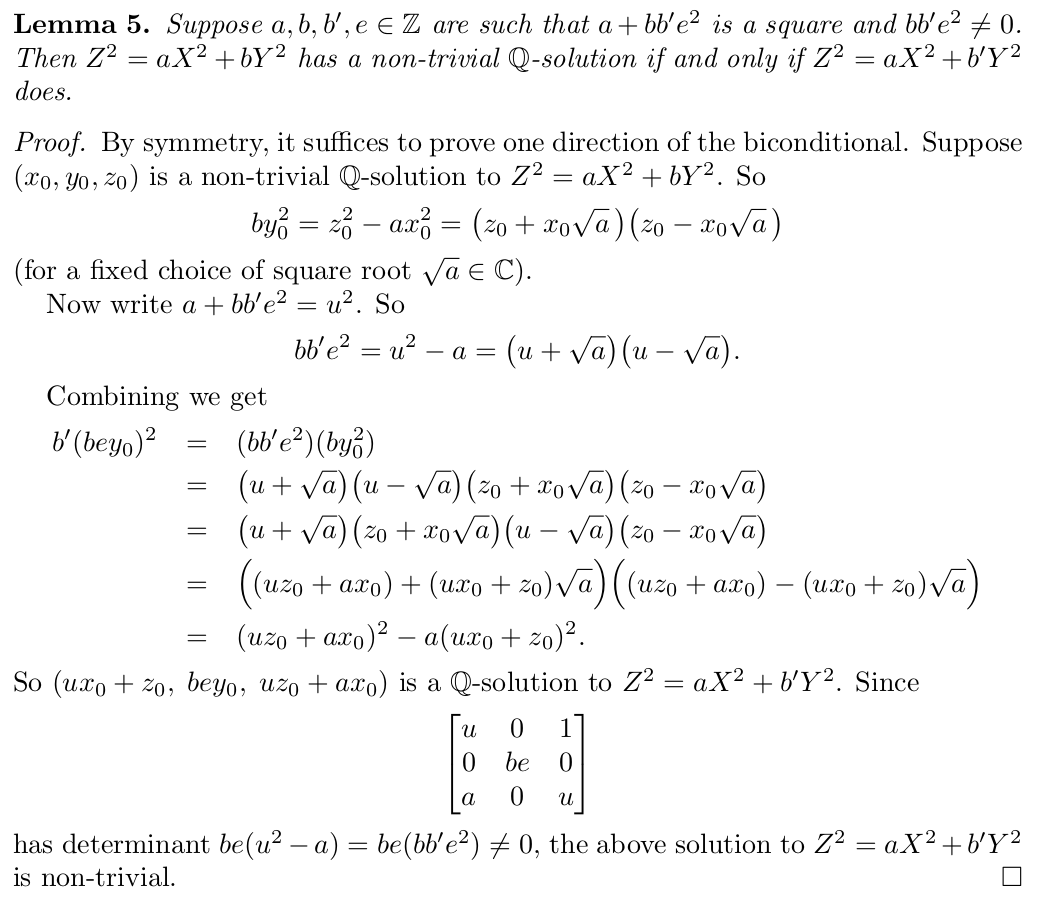

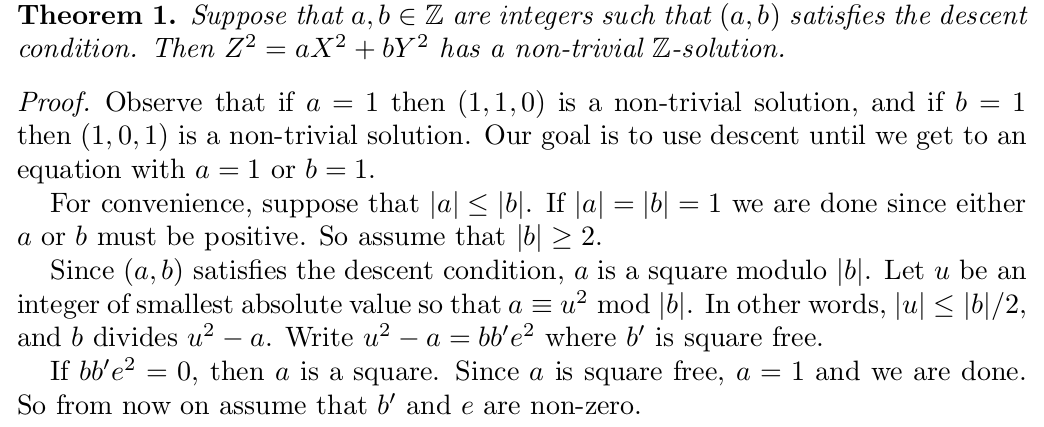

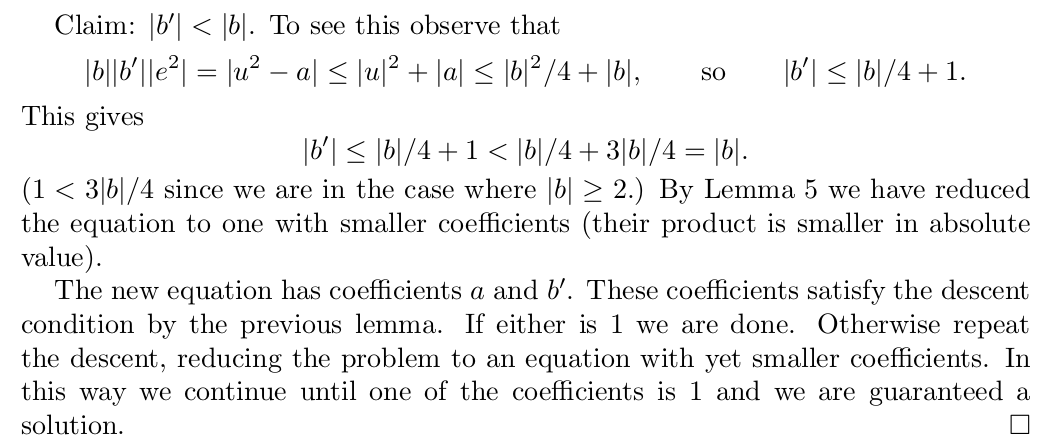